In [1]:
import findspark
findspark.init()

In [2]:
try: spark.stop()
except: pass

In [3]:
from pyspark.sql import SparkSession
# By default 12 executors if not specified
spark=SparkSession.builder.appName("RDD").master("local[4]").getOrCreate()
sc=spark.sparkContext

# Loading data

### Parallelized Collections

In [4]:
rdd=sc.parallelize([("a",7), ("a",2), ("b",2)])
rdd.collect()

[('a', 7), ('a', 2), ('b', 2)]

In [5]:
rdd2=sc.parallelize([('a',2), ('d',1), ('b',1), ('b',1)])
rdd2.collect()

[('a', 2), ('d', 1), ('b', 1), ('b', 1)]

In [6]:
rdd3=sc.parallelize(range(100))
rdd3.take(3)

[0, 1, 2]

In [7]:
rdd4=sc.parallelize([('a',['x','y','z']),
                     ('b',['p','r'])])
rdd4.collect()

[('a', ['x', 'y', 'z']), ('b', ['p', 'r'])]

### External data

In [8]:
# read all files and flatmap in 1 list
textFile=sc.textFile("data/textFiles/*.txt")
# textFile=sc.textFile("hdfs://localhost:9000/data/sample1.txt")
# textFile=sc.textFile("data/textFiles")
textFile.collect()

['Utilitatis causa amicitia est quaesita.',
 'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Collatio igitur ista te nihil iuvat. Honesta oratio, Socratica, Platonis etiam. Primum in nostrane potestate est, quid meminerimus? Duo Reges: constructio interrete. Quid, si etiam iucunda memoria est praeteritorum malorum? Si quidem, inquit, tollerem, sed relinquo. An nisi populari fama?',
 '',
 'Quamquam id quidem licebit iis existimare, qui legerint. Summum a vobis bonum voluptas dicitur. At hoc in eo M. Refert tamen, quo modo. Quid sequatur, quid repugnet, vident. Iam id ipsum absurdum, maximum malum neglegi.',
 'Aeque enim contingit omnibus fidibus, ut incontentae sint.',
 'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quae cum ita sint, effectum est nihil esse malum, quod turpe non sit. Itaque nostrum est-quod nostrum dico, artis est-ad ea principia, quae accepimus. Quod totum contra est. Duo Reges: constructio interrete. Atqui iste locus est, Piso, tibi etiam atque e

In [9]:
textFile.glom().collect()

[['Utilitatis causa amicitia est quaesita.',
  'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Collatio igitur ista te nihil iuvat. Honesta oratio, Socratica, Platonis etiam. Primum in nostrane potestate est, quid meminerimus? Duo Reges: constructio interrete. Quid, si etiam iucunda memoria est praeteritorum malorum? Si quidem, inquit, tollerem, sed relinquo. An nisi populari fama?',
  '',
  'Quamquam id quidem licebit iis existimare, qui legerint. Summum a vobis bonum voluptas dicitur. At hoc in eo M. Refert tamen, quo modo. Quid sequatur, quid repugnet, vident. Iam id ipsum absurdum, maximum malum neglegi.'],
 ['Aeque enim contingit omnibus fidibus, ut incontentae sint.',
  'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quae cum ita sint, effectum est nihil esse malum, quod turpe non sit. Itaque nostrum est-quod nostrum dico, artis est-ad ea principia, quae accepimus. Quod totum contra est. Duo Reges: constructio interrete. Atqui iste locus est, Piso, tibi etiam 

In [10]:
textFile.getNumPartitions()

3

In [11]:
# read from 1 file
textFile=sc.textFile("data/textFiles/sample1.txt")
textFile.collect()

['Utilitatis causa amicitia est quaesita.',
 'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Collatio igitur ista te nihil iuvat. Honesta oratio, Socratica, Platonis etiam. Primum in nostrane potestate est, quid meminerimus? Duo Reges: constructio interrete. Quid, si etiam iucunda memoria est praeteritorum malorum? Si quidem, inquit, tollerem, sed relinquo. An nisi populari fama?',
 '',
 'Quamquam id quidem licebit iis existimare, qui legerint. Summum a vobis bonum voluptas dicitur. At hoc in eo M. Refert tamen, quo modo. Quid sequatur, quid repugnet, vident. Iam id ipsum absurdum, maximum malum neglegi.']

In [12]:
# read all files as tuple in key as path and value as text file with '\n'
textFile=sc.wholeTextFiles("data/textFiles")
textFile.take(2)

[('file:/D:/Projects/Python/pyspark/Topic-wise/data/textFiles/sample1.txt',
  'Utilitatis causa amicitia est quaesita.\nLorem ipsum dolor sit amet, consectetur adipiscing elit. Collatio igitur ista te nihil iuvat. Honesta oratio, Socratica, Platonis etiam. Primum in nostrane potestate est, quid meminerimus? Duo Reges: constructio interrete. Quid, si etiam iucunda memoria est praeteritorum malorum? Si quidem, inquit, tollerem, sed relinquo. An nisi populari fama?\n\nQuamquam id quidem licebit iis existimare, qui legerint. Summum a vobis bonum voluptas dicitur. At hoc in eo M. Refert tamen, quo modo. Quid sequatur, quid repugnet, vident. Iam id ipsum absurdum, maximum malum neglegi.'),
 ('file:/D:/Projects/Python/pyspark/Topic-wise/data/textFiles/sample2.txt',
  'Aeque enim contingit omnibus fidibus, ut incontentae sint.\nLorem ipsum dolor sit amet, consectetur adipiscing elit. Quae cum ita sint, effectum est nihil esse malum, quod turpe non sit. Itaque nostrum est-quod nostrum dico, art

# Retrieving RDD info

In [13]:
rdd.getNumPartitions() # equals total number of cores

4

In [14]:
rdd.count()  # Count RDD instances
#[('a', 7), ('a', 2), ('b', 2)]

3

In [15]:
rdd.countByKey() # only key counted
#[('a', 7), ('a', 2), ('b', 2)]

defaultdict(int, {'a': 2, 'b': 1})

In [16]:
rdd.countByValue() # the whole () is considered and counted
#[('a', 7), ('a', 2), ('b', 2)]

defaultdict(int, {('a', 7): 1, ('a', 2): 1, ('b', 2): 1})

In [17]:
print(rdd.glom().collect())
rdd.collectAsMap() #Return (key,value) pairs as a dictionary
#[('a', 7), ('a', 2), ('b', 2)]

[[], [('a', 7)], [('a', 2)], [('b', 2)]]


{'a': 2, 'b': 2}

In [18]:
rdd3.sum()
# range(100) -> 0-99

4950

In [19]:
# Check whether RDD is emp
sc.parallelize([]).isEmpty()

True

In [20]:
# range(100) -> 0-99
rdd3.max()

99

In [21]:
rdd3.min()

0

In [22]:
rdd3.mean() #mean is the average of a data set

49.5

In [23]:
'''A standard deviation is a statistic that measures the dispersion of a 
dataset relative to its mean. The standard deviation is calculated as the 
square root of variance by determining each data point's deviation relative 
to the mean. If the data points are further from the mean, there is a 
higher deviation within the data set; thus, the more spread out the data, 
the higher the standard deviation.'''
rdd3.stdev()

28.86607004772212

In [47]:
'''variance is the expectation of the squared deviation of a random variable 
from its mean. Variance is a measure of dispersion, meaning it is a measure 
of how far a set of numbers is spread out from their average value.'''
rdd3.variance()

833.25

In [49]:
rdd3.histogram(3) #Compute histogram by bins

([0, 33, 66, 99], [33, 33, 34])

In [119]:
rdd3.stats()

(count: 100, mean: 49.5, stdev: 28.86607004772212, max: 99.0, min: 0.0)

# Selecting data (Getting)

In [51]:
rdd.collect() #Return a list with all RDD elements

[('a', 7), ('a', 2), ('b', 2)]

In [61]:
rdd.take(5) #Take first 5 RDD elements

[('a', 7), ('a', 2), ('b', 2)]

In [67]:
print(rdd.takeOrdered(5,key = lambda x: x[1]))
print(rdd.takeOrdered(5,key = lambda x: -x[1]))

[('a', 2), ('b', 2), ('a', 7)]
[('a', 7), ('a', 2), ('b', 2)]


In [71]:
print(rdd3.takeSample(False,0.5))
print(rdd3.takeSample(True,0.5))

TypeError: slice indices must be integers or None or have an __index__ method

In [55]:
rdd.first() 

('a', 7)

In [59]:
rdd.top(3) #Take top 3 RDD elements

[('b', 2), ('a', 7), ('a', 2)]

In [72]:
print(rdd.filter(lambda x: x[1] > 2).toDebugString())

b'(4) PythonRDD[54] at RDD at PythonRDD.scala:53 []\n |  ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 []'


In [104]:
print(rdd3.glom().collect())
def f1(lists): 
    return lists
def f2(lists): 
    yield sum(lists)
print(rdd3.mapPartitions(f1).collect())
print(rdd3.mapPartitions(f2).collect())

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74], [75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[300, 925, 1550, 2175]


In [103]:
def f1(splitIndex, iterator): yield (splitIndex,iterator)
def f2(splitIndex, iterator): 
    return (splitIndex,iterator)
print(rdd3.mapPartitionsWithIndex(f1).collect())
print(rdd3.mapPartitionsWithIndex(f2).collect())

[(0, range(0, 25)), (1, range(25, 50)), (2, range(50, 75)), (3, range(75, 100))]
[0, range(0, 25), 1, range(25, 50), 2, range(50, 75), 3, range(75, 100)]


# Selecting data (Sampling)

In [72]:
rdd3.sample(False,0.10,81).collect()
# with replacement=false, total=10%, seed=81

[4, 26, 39, 41, 42, 52, 63, 76, 80, 86, 97]

# Selecting data (Filtering)

In [76]:
print(rdd.filter(lambda x: "a" in x).collect())
print(rdd.filter(lambda x: 7 in x).collect())

[('a', 7), ('a', 2)]
[('a', 7)]


In [80]:
rdd2.distinct().collect()  # Return distinct RDD values
# [('a', 2), ('d', 1), ('b', 1), ('b', 1)]

[('a', 2), ('b', 1), ('d', 1)]

In [81]:
rdd.keys().collect() # Return (key,value) RDD's keys

['a', 'a', 'b']

# Iterating (prints on console and not here)

In [82]:
import sys
sys.stdout = open(1, 'w')
def f(x): print(x)
sc.parallelize([1, 2, 3, 4, 5]).foreach(f)
print('this will show up in the terminal', file=sys.stdout)

In [ ]:
import sys
sys.stdout = open(1, 'w')
def f(x): print(x)
sc.parallelize([1, 2, 3, 4, 5]).foreach(f)
print('this will show up in the terminal', file=sys.stdout)

# Applying functions

In [83]:
# Apply a function to each RDD element 
rdd.map(lambda x: x+(x[1],x[0])).collect()

[('a', 7, 7, 'a'), ('a', 2, 2, 'a'), ('b', 2, 2, 'b')]

In [84]:
# Apply a function to each RDD element and flatten the result
rdd.flatMap(lambda x: x+(x[1],x[0])).collect()

['a', 7, 7, 'a', 'a', 2, 2, 'a', 'b', 2, 2, 'b']

In [14]:
# Apply a flatMap function to each (key,value) pair of rdd4 without changing the keys
rdd4.flatMapValues(lambda x: x).collect() 
# [('a', ['x', 'y', 'z']), ('b', ['p', 'r'])]

[('a', 'x'), ('a', 'y'), ('a', 'z'), ('b', 'p'), ('b', 'r')]

In [19]:
# Apply a flatMap function to each (key,value) pair of rdd4 without changing the keys
rdd4.flatMapValues(lambda x: (list('ABC'), x)).collect() 
# [('a', ['x', 'y', 'z']), ('b', ['p', 'r'])]

[('a', ['A', 'B', 'C']),
 ('a', ['x', 'y', 'z']),
 ('b', ['A', 'B', 'C']),
 ('b', ['p', 'r'])]

In [20]:
rdd4.flatMapValues(lambda x: list(zip(list('ABC'), x))).collect() 
# [('a', ['x', 'y', 'z']), ('b', ['p', 'r'])]

[('a', ('A', 'x')),
 ('a', ('B', 'y')),
 ('a', ('C', 'z')),
 ('b', ('A', 'p')),
 ('b', ('B', 'r'))]

In [12]:
rdd.groupByKey().mapValues(lambda x: sum(x)).collect()
# [('a', 7), ('a', 2), ('b', 2)] -> [('b', [2]), ('a', [7, 2])]

[('b', 2), ('a', 9)]

# Sort and Order By

In [88]:
rdd2.sortBy(lambda x: x[1]).collect()

[('d', 1), ('b', 1), ('b', 1), ('a', 2)]

In [89]:
rdd2.sortByKey().collect()

[('a', 2), ('b', 1), ('b', 1), ('d', 1)]

In [91]:
# orderBy in DF only

# Mathematical Operations

In [105]:
(rdd+rdd2).collect()

[('a', 7), ('a', 2), ('b', 2), ('a', 2), ('d', 1), ('b', 1), ('b', 1)]

In [92]:
rdd.subtract(rdd2).collect()
# [('a', 7), ('a', 2), ('b', 2)]
# [('a', 2), ('d', 1), ('b', 1), ('b', 1)]

[('b', 2), ('a', 7)]

In [93]:
rdd2.subtractByKey(rdd).collect()
# [('a', 2), ('d', 1), ('b', 1), ('b', 1)]
# [('a', 7), ('a', 2), ('b', 2)]

[('d', 1)]

In [94]:
rdd.cartesian(rdd2).collect() #Return the Cartesian product of rdd and rdd2
# [('a', 7), ('a', 2), ('b', 2)]
# [('a', 2), ('d', 1), ('b', 1), ('b', 1)]

[(('a', 7), ('a', 2)),
 (('a', 7), ('d', 1)),
 (('a', 7), ('b', 1)),
 (('a', 7), ('b', 1)),
 (('a', 2), ('a', 2)),
 (('a', 2), ('d', 1)),
 (('a', 2), ('b', 1)),
 (('a', 2), ('b', 1)),
 (('b', 2), ('a', 2)),
 (('b', 2), ('d', 1)),
 (('b', 2), ('b', 1)),
 (('b', 2), ('b', 1))]

In [81]:
print(rdd.union(rdd2).collect())
print(rdd2.union(rdd).collect())

[('a', 7), ('a', 2), ('b', 2), ('a', 2), ('d', 1), ('b', 1), ('b', 1)]
[('a', 2), ('d', 1), ('b', 1), ('b', 1), ('a', 7), ('a', 2), ('b', 2)]


In [80]:
print(rdd.intersection(rdd2).collect())
print(rdd2.intersection(rdd).collect())

[('a', 2)]
[('a', 2)]


# Reshaping data (Reducing)

In [95]:
rdd.reduceByKey(lambda x,y: x+y).collect()
# [('a', 7), ('a', 2), ('b', 2)]

[('b', 2), ('a', 9)]

In [97]:
rdd.reduce(lambda x,y: x+y)
# [('a', 7), ('a', 2), ('b', 2)]

('a', 7, 'a', 2, 'b', 2)

# Reshaping data (Grouping By)

In [100]:
rdd3.groupBy(lambda x: x%2).mapValues(list).collect()
# range(100)

[(0,
  [0,
   2,
   4,
   6,
   8,
   10,
   12,
   14,
   16,
   18,
   20,
   22,
   24,
   26,
   28,
   30,
   32,
   34,
   36,
   38,
   40,
   42,
   44,
   46,
   48,
   50,
   52,
   54,
   56,
   58,
   60,
   62,
   64,
   66,
   68,
   70,
   72,
   74,
   76,
   78,
   80,
   82,
   84,
   86,
   88,
   90,
   92,
   94,
   96,
   98])]

In [101]:
rdd.groupByKey().mapValues(list).collect()
# [('a', 7), ('a', 2), ('b', 2)]

[('b', [2]), ('a', [7, 2])]

# Reshaping data (Zip with Index)

In [14]:
rdd.zipWithIndex().take(5)

[(('a', 7), 0), (('a', 2), 1), (('b', 2), 2)]

In [15]:
rdd.zipWithIndex().map(lambda x: [x[1]] + list(x[0])).take(5)

[[0, 'a', 7], [1, 'a', 2], [2, 'b', 2]]

In [18]:
header = ['index'] + ['char','count']
rdd.zipWithIndex().map(lambda x: [x[1]] + list(x[0])).toDF(header).show()

+-----+----+-----+
|index|char|count|
+-----+----+-----+
|    0|   a|    7|
|    1|   a|    2|
|    2|   b|    2|
+-----+----+-----+



# Reshaping data (Aggregating)
aggregate(zeroValue, seqOp, combOp)

aggregateByKey(zeroValue, seqOp, combOp)
- zeroValue: is like a data container. Its structure should match with the data structure of the returned values from the seqOp function.
- seqOp: is a function that takes two arguments: the first argument is the zeroValue and the second argument is an element from the RDD. The zeroValue gets updated with the returned value after every run.
- combOp: is a function that takes two arguments: the first argument is the final zeroValue from one partition and the other is another final zeroValue from another partition.

In [9]:
seqOp = (lambda x,y: (x[0]+y, x[1]+1))
combOp = (lambda x,y: (x[0]+y[0], x[1]+y[1]))
#Aggregate RDD elements of each partition and then the results
rdd3.aggregate(
    (0,0),
    seqOp, # combine values within partition
    combOp) # combine values across partition
# range(100)

(4950, 100)

In [11]:
seqOp = (lambda x,y: (x+y))
combOp = (lambda x,y: (x+y))
#Aggregate RDD elements of each partition and then the results
rdd3.aggregate(
    0,
    seqOp, # combine values within partition
    combOp) # combine values across partition
# range(100)

4950

In [12]:
#Aggregate values of each RDD key
seqOp = (lambda x,y: (x[0]+y, x[1]+1))
combOp = (lambda x,y: (x[0]+y[0], x[1]+y[1]))
rdd.aggregateByKey(
    (0,0),
    seqOp, # combine values within partition
    combOp # combine values across partition
).collect()

[('b', (2, 1)), ('a', (9, 2))]

In [13]:
seqOp = (lambda x,y: (x+y))
combOp = (lambda x,y: (x+y))
rdd.aggregateByKey(
    0,
    seqOp, # combine values within partition
    combOp # combine values across partition
).collect()

[('b', 2), ('a', 9)]

In [108]:
#Aggregate the elements of each partition, and then the results
def add(a,b): return a+b
rdd3.fold(0,add)

4950

In [114]:
#Merge the values for each key
rdd.foldByKey(0, add).collect()

[('b', 2), ('a', 9)]

In [110]:
#Create tuples of RDD elements by applying a function
rdd3.keyBy(lambda x: x+x).take(10)

[(0, 0),
 (2, 1),
 (4, 2),
 (6, 3),
 (8, 4),
 (10, 5),
 (12, 6),
 (14, 7),
 (16, 8),
 (18, 9),
 (20, 10),
 (22, 11),
 (24, 12),
 (26, 13),
 (28, 14),
 (30, 15),
 (32, 16),
 (34, 17),
 (36, 18),
 (38, 19),
 (40, 20),
 (42, 21),
 (44, 22),
 (46, 23),
 (48, 24),
 (50, 25),
 (52, 26),
 (54, 27),
 (56, 28),
 (58, 29),
 (60, 30),
 (62, 31),
 (64, 32),
 (66, 33),
 (68, 34),
 (70, 35),
 (72, 36),
 (74, 37),
 (76, 38),
 (78, 39),
 (80, 40),
 (82, 41),
 (84, 42),
 (86, 43),
 (88, 44),
 (90, 45),
 (92, 46),
 (94, 47),
 (96, 48),
 (98, 49),
 (100, 50),
 (102, 51),
 (104, 52),
 (106, 53),
 (108, 54),
 (110, 55),
 (112, 56),
 (114, 57),
 (116, 58),
 (118, 59),
 (120, 60),
 (122, 61),
 (124, 62),
 (126, 63),
 (128, 64),
 (130, 65),
 (132, 66),
 (134, 67),
 (136, 68),
 (138, 69),
 (140, 70),
 (142, 71),
 (144, 72),
 (146, 73),
 (148, 74),
 (150, 75),
 (152, 76),
 (154, 77),
 (156, 78),
 (158, 79),
 (160, 80),
 (162, 81),
 (164, 82),
 (166, 83),
 (168, 84),
 (170, 85),
 (172, 86),
 (174, 87),
 (176, 88

# Repartitioning / coalesce

In [125]:
from pyspark.sql.functions import col
rdd.toDF(["val","count"]).repartition(5,col("count")).rdd.glom().collect()

[[],
 [Row(val='a', count=7)],
 [],
 [Row(val='a', count=2), Row(val='b', count=2)],
 []]

In [126]:
rdd.toDF(["val","count"]).repartition(5,col("val")).rdd.glom().collect()

[[Row(val='a', count=7), Row(val='a', count=2)],
 [Row(val='b', count=2)],
 [],
 [],
 []]

In [13]:
rdd.coalesce(1).collect()

[('a', 7), ('a', 2), ('b', 2)]

# Saving

In [128]:
rdd.saveAsTextFile('save/rdddemo1')

In [113]:
rdd.coalesce(1).saveAsTextFile('save/rdddemo2')

In [106]:
rdd.coalesce(1).saveAsPickleFile('save/rdddemo3')

In [117]:
rdd.coalesce(1).saveAsHadoopFile("hdfs://localhost:9000/save/rdddemo6",
                                  "org.apache.hadoop.mapred.TextOutputFormat")

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.saveAsHadoopFile.
: org.apache.spark.SparkException: Job aborted.
	at org.apache.spark.internal.io.SparkHadoopWriter$.write(SparkHadoopWriter.scala:100)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopDataset$1.apply$mcV$sp(PairRDDFunctions.scala:1096)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopDataset$1.apply(PairRDDFunctions.scala:1094)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopDataset$1.apply(PairRDDFunctions.scala:1094)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:385)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopDataset(PairRDDFunctions.scala:1094)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$4.apply$mcV$sp(PairRDDFunctions.scala:1067)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$4.apply(PairRDDFunctions.scala:1032)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$4.apply(PairRDDFunctions.scala:1032)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:385)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1032)
	at org.apache.spark.api.python.PythonRDD$.saveAsHadoopFile(PythonRDD.scala:555)
	at org.apache.spark.api.python.PythonRDD.saveAsHadoopFile(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 100.0 failed 1 times, most recent failure: Lost task 0.0 in stage 100.0 (TID 408, localhost, executor driver): org.apache.spark.SparkException: Task failed while writing rows
	at org.apache.spark.internal.io.SparkHadoopWriter$.org$apache$spark$internal$io$SparkHadoopWriter$$executeTask(SparkHadoopWriter.scala:157)
	at org.apache.spark.internal.io.SparkHadoopWriter$$anonfun$3.apply(SparkHadoopWriter.scala:83)
	at org.apache.spark.internal.io.SparkHadoopWriter$$anonfun$3.apply(SparkHadoopWriter.scala:78)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:411)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:417)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.hadoop.ipc.RemoteException(java.io.IOException): File /save/rdddemo6/_temporary/0/_temporary/attempt_20210912164124_0175_m_000000_0/part-00000 could only be replicated to 0 nodes instead of minReplication (=1).  There are 0 datanode(s) running and no node(s) are excluded in this operation.
	at org.apache.hadoop.hdfs.server.blockmanagement.BlockManager.chooseTarget4NewBlock(BlockManager.java:1620)
	at org.apache.hadoop.hdfs.server.namenode.FSNamesystem.getNewBlockTargets(FSNamesystem.java:3135)
	at org.apache.hadoop.hdfs.server.namenode.FSNamesystem.getAdditionalBlock(FSNamesystem.java:3059)
	at org.apache.hadoop.hdfs.server.namenode.NameNodeRpcServer.addBlock(NameNodeRpcServer.java:725)
	at org.apache.hadoop.hdfs.protocolPB.ClientNamenodeProtocolServerSideTranslatorPB.addBlock(ClientNamenodeProtocolServerSideTranslatorPB.java:493)
	at org.apache.hadoop.hdfs.protocol.proto.ClientNamenodeProtocolProtos$ClientNamenodeProtocol$2.callBlockingMethod(ClientNamenodeProtocolProtos.java)
	at org.apache.hadoop.ipc.ProtobufRpcEngine$Server$ProtoBufRpcInvoker.call(ProtobufRpcEngine.java:616)
	at org.apache.hadoop.ipc.RPC$Server.call(RPC.java:982)
	at org.apache.hadoop.ipc.Server$Handler$1.run(Server.java:2217)
	at org.apache.hadoop.ipc.Server$Handler$1.run(Server.java:2213)
	at java.security.AccessController.doPrivileged(Native Method)
	at javax.security.auth.Subject.doAs(Subject.java:422)
	at org.apache.hadoop.security.UserGroupInformation.doAs(UserGroupInformation.java:1762)
	at org.apache.hadoop.ipc.Server$Handler.run(Server.java:2211)

	at org.apache.hadoop.ipc.Client.call(Client.java:1475)
	at org.apache.hadoop.ipc.Client.call(Client.java:1412)
	at org.apache.hadoop.ipc.ProtobufRpcEngine$Invoker.invoke(ProtobufRpcEngine.java:229)
	at com.sun.proxy.$Proxy26.addBlock(Unknown Source)
	at org.apache.hadoop.hdfs.protocolPB.ClientNamenodeProtocolTranslatorPB.addBlock(ClientNamenodeProtocolTranslatorPB.java:418)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at org.apache.hadoop.io.retry.RetryInvocationHandler.invokeMethod(RetryInvocationHandler.java:191)
	at org.apache.hadoop.io.retry.RetryInvocationHandler.invoke(RetryInvocationHandler.java:102)
	at com.sun.proxy.$Proxy27.addBlock(Unknown Source)
	at org.apache.hadoop.hdfs.DFSOutputStream$DataStreamer.locateFollowingBlock(DFSOutputStream.java:1455)
	at org.apache.hadoop.hdfs.DFSOutputStream$DataStreamer.nextBlockOutputStream(DFSOutputStream.java:1251)
	at org.apache.hadoop.hdfs.DFSOutputStream$DataStreamer.run(DFSOutputStream.java:448)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1925)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1913)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1912)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1912)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:948)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:948)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:948)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2146)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2095)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2084)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:759)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2067)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2088)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2120)
	at org.apache.spark.internal.io.SparkHadoopWriter$.write(SparkHadoopWriter.scala:78)
	... 27 more
Caused by: org.apache.spark.SparkException: Task failed while writing rows
	at org.apache.spark.internal.io.SparkHadoopWriter$.org$apache$spark$internal$io$SparkHadoopWriter$$executeTask(SparkHadoopWriter.scala:157)
	at org.apache.spark.internal.io.SparkHadoopWriter$$anonfun$3.apply(SparkHadoopWriter.scala:83)
	at org.apache.spark.internal.io.SparkHadoopWriter$$anonfun$3.apply(SparkHadoopWriter.scala:78)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:411)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:417)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: org.apache.hadoop.ipc.RemoteException(java.io.IOException): File /save/rdddemo6/_temporary/0/_temporary/attempt_20210912164124_0175_m_000000_0/part-00000 could only be replicated to 0 nodes instead of minReplication (=1).  There are 0 datanode(s) running and no node(s) are excluded in this operation.
	at org.apache.hadoop.hdfs.server.blockmanagement.BlockManager.chooseTarget4NewBlock(BlockManager.java:1620)
	at org.apache.hadoop.hdfs.server.namenode.FSNamesystem.getNewBlockTargets(FSNamesystem.java:3135)
	at org.apache.hadoop.hdfs.server.namenode.FSNamesystem.getAdditionalBlock(FSNamesystem.java:3059)
	at org.apache.hadoop.hdfs.server.namenode.NameNodeRpcServer.addBlock(NameNodeRpcServer.java:725)
	at org.apache.hadoop.hdfs.protocolPB.ClientNamenodeProtocolServerSideTranslatorPB.addBlock(ClientNamenodeProtocolServerSideTranslatorPB.java:493)
	at org.apache.hadoop.hdfs.protocol.proto.ClientNamenodeProtocolProtos$ClientNamenodeProtocol$2.callBlockingMethod(ClientNamenodeProtocolProtos.java)
	at org.apache.hadoop.ipc.ProtobufRpcEngine$Server$ProtoBufRpcInvoker.call(ProtobufRpcEngine.java:616)
	at org.apache.hadoop.ipc.RPC$Server.call(RPC.java:982)
	at org.apache.hadoop.ipc.Server$Handler$1.run(Server.java:2217)
	at org.apache.hadoop.ipc.Server$Handler$1.run(Server.java:2213)
	at java.security.AccessController.doPrivileged(Native Method)
	at javax.security.auth.Subject.doAs(Subject.java:422)
	at org.apache.hadoop.security.UserGroupInformation.doAs(UserGroupInformation.java:1762)
	at org.apache.hadoop.ipc.Server$Handler.run(Server.java:2211)

	at org.apache.hadoop.ipc.Client.call(Client.java:1475)
	at org.apache.hadoop.ipc.Client.call(Client.java:1412)
	at org.apache.hadoop.ipc.ProtobufRpcEngine$Invoker.invoke(ProtobufRpcEngine.java:229)
	at com.sun.proxy.$Proxy26.addBlock(Unknown Source)
	at org.apache.hadoop.hdfs.protocolPB.ClientNamenodeProtocolTranslatorPB.addBlock(ClientNamenodeProtocolTranslatorPB.java:418)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at org.apache.hadoop.io.retry.RetryInvocationHandler.invokeMethod(RetryInvocationHandler.java:191)
	at org.apache.hadoop.io.retry.RetryInvocationHandler.invoke(RetryInvocationHandler.java:102)
	at com.sun.proxy.$Proxy27.addBlock(Unknown Source)
	at org.apache.hadoop.hdfs.DFSOutputStream$DataStreamer.locateFollowingBlock(DFSOutputStream.java:1455)
	at org.apache.hadoop.hdfs.DFSOutputStream$DataStreamer.nextBlockOutputStream(DFSOutputStream.java:1251)
	at org.apache.hadoop.hdfs.DFSOutputStream$DataStreamer.run(DFSOutputStream.java:448)


# Persist / Cache

In [24]:
rdd5=rdd.map(lambda x: (x[1],x[0]))
print(rdd.toDebugString().decode("utf-8"),end="\n\n")

(4) ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 []



## Persist
persist(Sortage Level): Persisting the RDD with the default storage level
unpersist(): Marking the RDD as non persistent and removing the block from memory and disk

1. MEMORY_ONLY (default) 
2. MEMORY_AND_DISK
3. MEMORY_ONLY_SER
4. MEMORY_ONLY_DISK_SER
5. DISC_ONLY
6. MEMORY_ONLY_2
7. MEMORY_AND_DISK_2
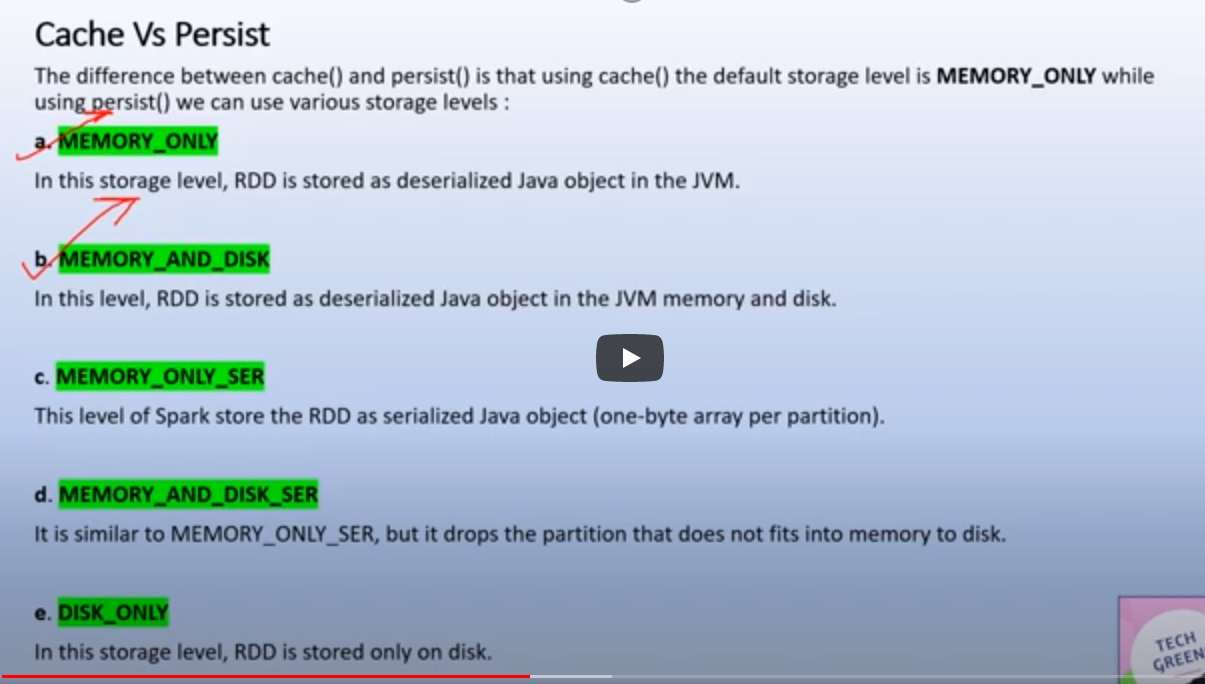

In [49]:
from pyspark import StorageLevel
print(rdd5.toDebugString().decode("utf-8"),end="\n\n")
rdd5.persist(StorageLevel.DISK_ONLY)
print(rdd5.toDebugString().decode("utf-8"),end="\n\n")
rdd5.count()
print(rdd5.toDebugString().decode("utf-8"),end="\n\n")
rdd5.unpersist()
print(rdd5.toDebugString().decode("utf-8"),end="\n\n")

(4) PythonRDD[24] at RDD at PythonRDD.scala:53 []
 |  ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 []

(4) PythonRDD[24] at RDD at PythonRDD.scala:53 [Disk Serialized 1x Replicated]
 |  ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 [Disk Serialized 1x Replicated]

(4) PythonRDD[24] at RDD at PythonRDD.scala:53 [Disk Serialized 1x Replicated]
 |       CachedPartitions: 4; MemorySize: 0.0 B; ExternalBlockStoreSize: 0.0 B; DiskSize: 216.0 B
 |  ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 [Disk Serialized 1x Replicated]

(4) PythonRDD[24] at RDD at PythonRDD.scala:53 []
 |  ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 []



In [50]:
rdd5.persist(StorageLevel.DISK_ONLY)
rdd5.storageLevel
print(rdd5.toDebugString().decode("utf-8"),end="\n\n")
rdd6=rdd5.filter(lambda x: x[1]=='a')
print(rdd6.toDebugString().decode("utf-8"),end="\n\n")
rdd6.unpersist()
print(rdd5.toDebugString().decode("utf-8"),end="\n\n")
rdd5.unpersist()
print(rdd5.toDebugString().decode("utf-8"),end="\n\n")

(4) PythonRDD[24] at RDD at PythonRDD.scala:53 [Disk Serialized 1x Replicated]
 |  ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 [Disk Serialized 1x Replicated]

(4) PythonRDD[27] at RDD at PythonRDD.scala:53 []
 |  PythonRDD[24] at RDD at PythonRDD.scala:53 []
 |  ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 []

(4) PythonRDD[24] at RDD at PythonRDD.scala:53 [Disk Serialized 1x Replicated]
 |  ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 [Disk Serialized 1x Replicated]

(4) PythonRDD[24] at RDD at PythonRDD.scala:53 []
 |  ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 []



## Cache
It is used to avoid unnecessary recomputation, same as persist(MEMORY_ONLY)

In [25]:
print(rdd5.toDebugString().decode("utf-8"),end="\n\n")
rdd5.setName("abc").cache()
print(rdd5.toDebugString().decode("utf-8"),end="\n\n")
rdd5.count()
print(rdd5.toDebugString().decode("utf-8"),end="\n\n")
rdd5.unpersist()
print(rdd5.toDebugString().decode("utf-8"),end="\n\n")

(4) PythonRDD[25] at RDD at PythonRDD.scala:53 []
 |  ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 []

(4) abc PythonRDD[25] at RDD at PythonRDD.scala:53 [Memory Serialized 1x Replicated]
 |  ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 [Memory Serialized 1x Replicated]

(4) abc PythonRDD[25] at RDD at PythonRDD.scala:53 [Memory Serialized 1x Replicated]
 |       CachedPartitions: 4; MemorySize: 216.0 B; ExternalBlockStoreSize: 0.0 B; DiskSize: 0.0 B
 |  ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 [Memory Serialized 1x Replicated]

(4) abc PythonRDD[25] at RDD at PythonRDD.scala:53 []
 |  ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 []



In [53]:
print(rdd5.toDebugString().decode("utf-8"),end="\n\n")
rdd5.cache()
rdd6=rdd5.filter(lambda x: x[1]=='a')
print(rdd6.toDebugString().decode("utf-8"),end="\n\n")
rdd6.unpersist()
print(rdd5.toDebugString().decode("utf-8"),end="\n\n")
rdd5.unpersist()
print(rdd5.toDebugString().decode("utf-8"),end="\n\n")

(4) PythonRDD[24] at RDD at PythonRDD.scala:53 []
 |  ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 []

(4) PythonRDD[30] at RDD at PythonRDD.scala:53 []
 |  PythonRDD[24] at RDD at PythonRDD.scala:53 []
 |  ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 []

(4) PythonRDD[24] at RDD at PythonRDD.scala:53 [Memory Serialized 1x Replicated]
 |  ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 [Memory Serialized 1x Replicated]

(4) PythonRDD[24] at RDD at PythonRDD.scala:53 []
 |  ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 []



# Checkpoint
It saves a file inside the checkpoint directory and all the reference of its parent RDD will be removed

In [44]:
print(rdd5.toDebugString().decode("utf-8"),end="\n\n")
rdd5.checkpoint
print(rdd5.toDebugString().decode("utf-8"),end="\n\n")
rdd5.count()
print(rdd5.toDebugString().decode("utf-8"),end="\n\n")

(4) PythonRDD[17] at RDD at PythonRDD.scala:53 []
 |  ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 []

(4) PythonRDD[17] at RDD at PythonRDD.scala:53 []
 |  ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 []

(4) PythonRDD[17] at RDD at PythonRDD.scala:53 []
 |  ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195 []

